# Buliding a Neural NetworkClassification model with scikit-learn's moons dataset.

### 1. Create a classification dataset using Scikit-Learn's `make_moons()` function
### 2. visualize it and then build a model to fit it at over 85% accuracy.

## **Import dependcies** [*Libraries and packages*]

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
# creating the dataset from sklearn's makemoons function
from sklearn.datasets import make_moons
# Create a dataset with 1000 examples
n_samples = 1000
X, y = make_moons(n_samples,
                  noise=0.03)


In [3]:
# Checking the shape of the data
X.shape, y.shape

((1000, 2), (1000,))

In [4]:
# X is features
# y is labels
X[: 10], y[:10]

(array([[ 1.8323374 , -0.01758091],
        [ 1.88743741, -0.06045387],
        [ 0.63939037,  0.73629594],
        [ 0.1918585 , -0.02668146],
        [-0.68472292,  0.7513497 ],
        [ 1.55490108, -0.36532066],
        [ 0.99273875,  0.31475761],
        [ 0.45771154,  0.81556849],
        [ 1.46066312, -0.42292204],
        [ 1.91825709,  0.05261729]]),
 array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1]))

In [5]:
# Checkout the single data
X[0], y[0]

(array([ 1.8323374 , -0.01758091]), 1)

In [6]:
# Make a dataFrame for the features & labels
import pandas as pd
moons = pd.DataFrame({"X1":X[:,0], "X2":X[:,1], "label":y})
moons.head()

,X1,X2,label
0,1.832337,-0.017581,1
1,1.887437,-0.060454,1
2,0.639390,0.736296,0
3,0.191859,-0.026681,1
4,-0.684723,0.751350,0


In [7]:
moons.label.value_counts()

1    500
0    500
Name: label, dtype: int64

In [72]:
# Split it into training and test sets
X_train = X[:800]
X_test = X[800:]
y_train = y[:800]
y_test = y[800:]

**binary classification problem. It's binary because there are only two labels (0 or 1).**

In [73]:
# Let's Check the Number of data in th test and train sets
len(X_train), len(X_test), len(y_train), len(y_test) 

(800, 200, 800, 200)

## Let's take our visualization a step further and plot our data.

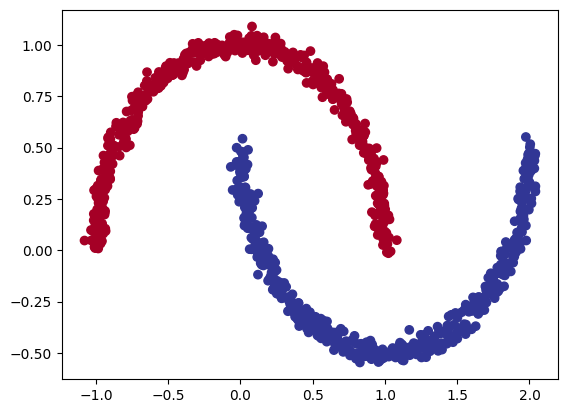

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y,cmap=plt.cm.RdYlBu)

## Input and output shapes

One of the most common issues you'll run into when building neural networks is shape mismatches.

In [75]:
# Check the shapes of our features and labels of training dataset
X_train.shape, y_train.shape

((800, 2), (800,))

In [74]:
# View the first example of features and labels in training Dataset
X_train[0], y_train[0]

(array([ 1.8323374 , -0.01758091]), 1)

## Creating the model

In [76]:
# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(10 , activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid", name="ouput_layer")
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])



## Fitting the Model

In [99]:
# 3. Fit the model ans saving the history
history_0 = model_1.fit(X_train, y_train,
            epochs=100,
            verbose=1)

Epoch 1/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 10/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 11/

In [78]:
# Summary 
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                30        
                                                                 
 dense_8 (Dense)             (None, 4)                 44        
                                                                 
 ouput_layer (Dense)         (None, 1)                 5         
                                                                 
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Evaluate the model on test data
model_1.evaluate(X_test,y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.0753 - accuracy: 1.0000


[0.07532022148370743, 1.0]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


(-0.647251801981711, 1.1907310949911134)

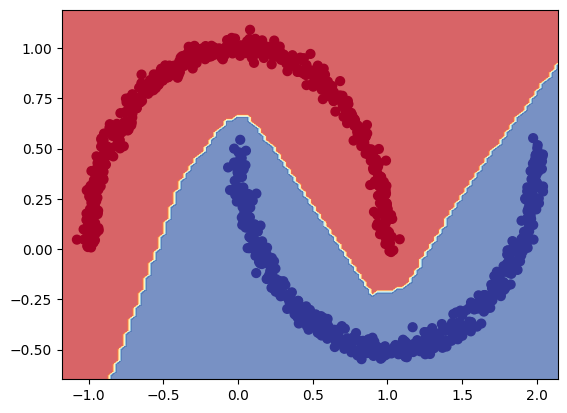

In [96]:
import numpy as np

# Declare the model variable
model = model_1

# Define the axis boundaries of the plot and create a meshgrid
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))

# Create X values (we're going to predict on all of these)
x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

# Make predictions using the trained model
y_pred = model.predict(x_in)

# Check for multi-class
if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
  print("doing multiclass classification...")
  # We have to reshape our predictions to get them ready for plotting
  y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
else:
  print("doing binary classifcation...")
  y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


**Finally!**

The model is ***perfect*** separating the two Moons.

In [97]:
# Evaluate our model on the test set
loss, accuracy = model_1.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 13ms/step - loss: 0.0183 - accuracy: 1.0000
Model loss on the test set: 0.01825820654630661
Model accuracy on the test set: 100.00%


In [101]:
# Information in the history variable using the .history attribute
pd.DataFrame(history_0.history)

,loss,accuracy
0,0.006182,1.0
1,0.006115,1.0
2,0.006049,1.0
3,0.005979,1.0
4,0.005917,1.0
...,...,...
95,0.002229,1.0
96,0.002206,1.0
97,0.002184,1.0
98,0.002161,1.0


## Results 

* Loss on the 20% Test Data = **0.01825820654630661**
* Accuracy on the 20% Test Data = **100.00%**
